<a href="https://colab.research.google.com/github/surabhiworld/Logistic-Regression/blob/main/Assignment_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <u><b> Objective </b></u>
## <b>To predict the whether a customer will churn or not, based on the variables available in the Telco customer churn data. </b>


### Logistic regression does not make many of the key assumptions of linear regression and general linear models that are based on ordinary least squares algorithms – particularly regarding linearity, normality, homoscedasticity, and measurement level.

### First, logistic regression does not require a linear relationship between the dependent and independent variables.  Second, the error terms (residuals) do not need to be normally distributed.  Third, homoscedasticity is not required.  Finally, the dependent variable in logistic regression is not measured on an interval or ratio scale.

### However, some other assumptions still apply.

### First, binary logistic regression requires the dependent variable to be binary and ordinal logistic regression requires the dependent variable to be ordinal.

### Second, logistic regression requires the observations to be independent of each other.  In other words, the observations should not come from repeated measurements or matched data.

### Third, logistic regression requires there to be little or no multicollinearity among the independent variables.  This means that the independent variables should not be too highly correlated with each other.

### Fourth, logistic regression assumes linearity of independent variables and log odds.  although this analysis does not require the dependent and independent variables to be related linearly, it requires that the independent variables are linearly related to the log odds.


### <b> In this assignment, you need to do the following : </b>

* ### Remove correlated variables and run Logistic Regression
* ### Also implement regularized logistic regression using the hyperparameter C in the sklearn implementation. Add details about how this hyperparameter affects the learning and performance of the model.
* ### Evaluate your logistic regression models using metrics such as roc_auc, log_loss, precision, recall, accuracy and f-score. You already know these metrics from your assignments in Module 1. Explain your observations about these metrics results.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
churn_df = pd.read_csv('https://raw.githubusercontent.com/surabhiworld/Logistic-Regression/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
len(churn_df[churn_df.duplicated()])

0

In [7]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

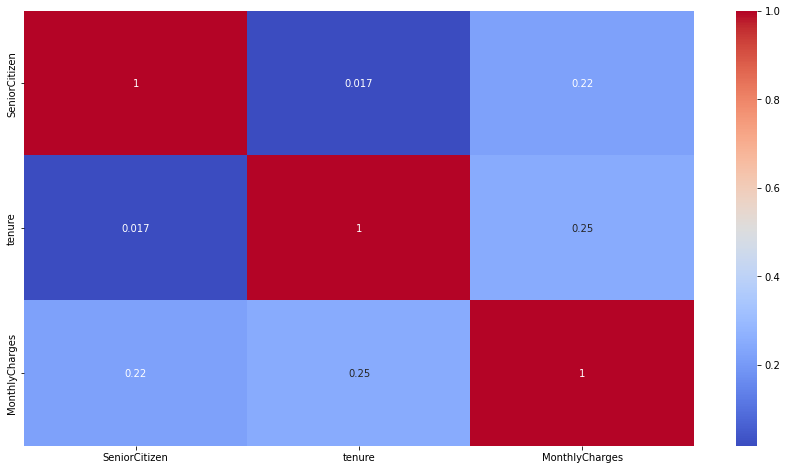

In [11]:
churn_df
plt.figure(figsize = (15,8))
correlation = churn_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


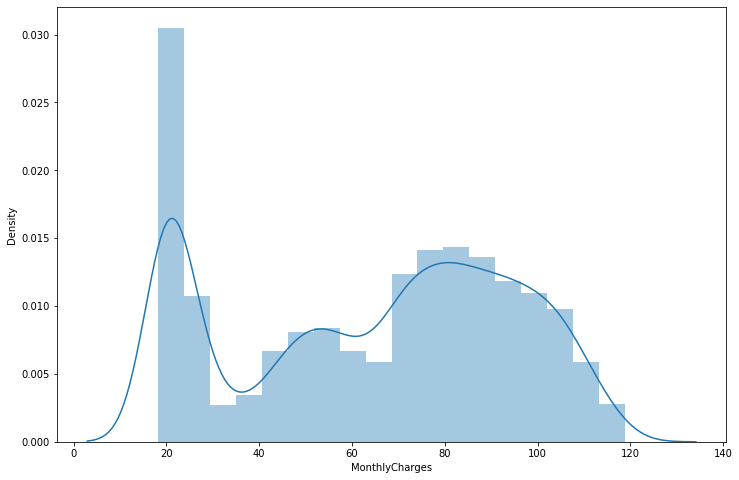

In [15]:
plt.figure(figsize = (12,8))
sns.distplot(churn_df['MonthlyCharges']);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


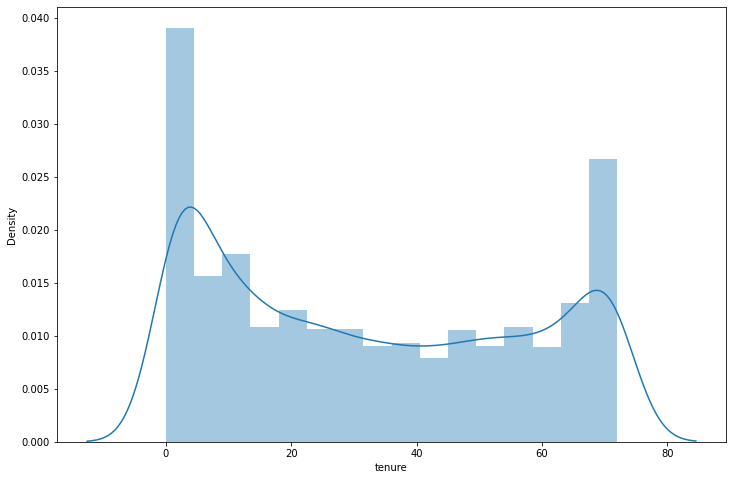

In [16]:
plt.figure(figsize = (12,8))
sns.distplot(churn_df['tenure']);

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.show>

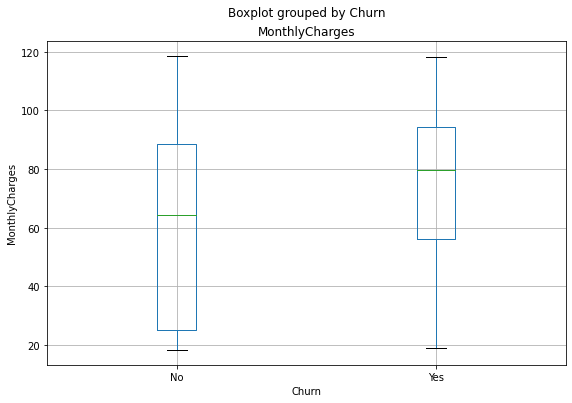

In [21]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
churn_df.boxplot(column = 'MonthlyCharges', by = 'Churn', ax = ax)
ax.set_ylabel('MonthlyCharges')
plt.show

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.show>

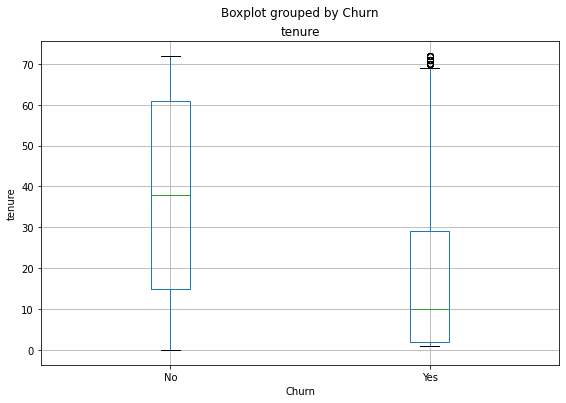

In [22]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
churn_df.boxplot(column = 'tenure', by = 'Churn', ax = ax)
ax.set_ylabel('tenure')
plt.show

In [25]:
churn_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [28]:
a = churn_df[['gender','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',]]

In [29]:
a

,gender,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [31]:
a = pd.get_dummies(a,drop_first = True)
a

,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,0,1,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,1,1,0,1,1,0,0,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


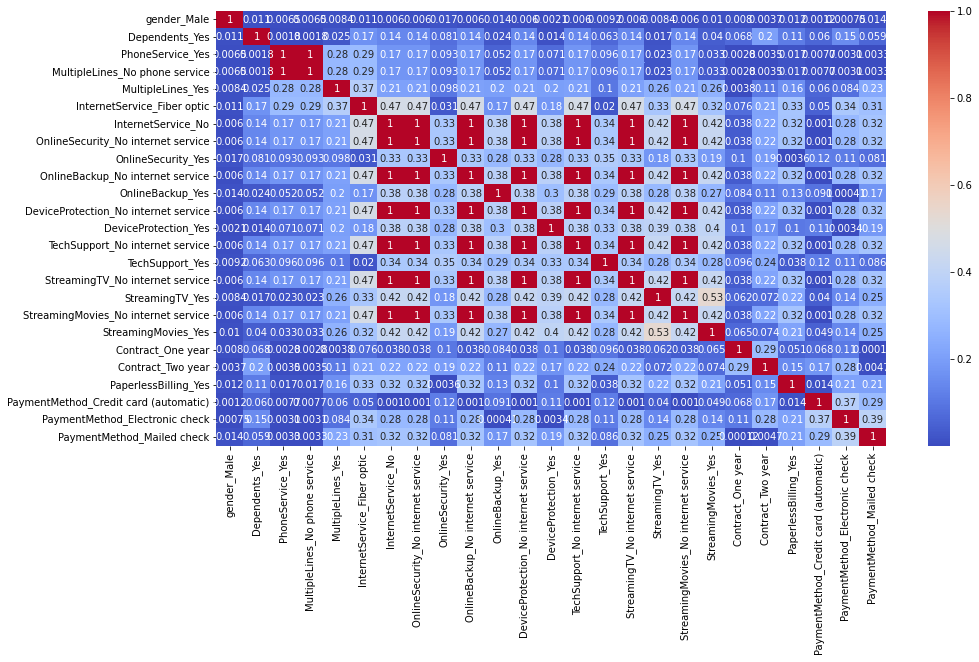

In [32]:
plt.figure(figsize = (15,8))
correlation = a.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')

In [33]:
churn_df['class'] = churn_df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)

In [34]:
churn_df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,1


In [35]:
churn_df[churn_df.TotalCharges.str.contains(" ",'')]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0


In [36]:
churn_df[churn_df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,0


In [40]:
churn_df['TotalCharges'] = churn_df['TotalCharges'].replace(' ',np.nan)

In [41]:
churn_df[churn_df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,class


In [42]:
churn_df['TotalCharges'].isna().sum()

11

In [43]:
churn_df['TotalCharges'] = pd.to_numeric(churn_df['TotalCharges'])

In [44]:
df1 = churn_df.loc[:,['MonthlyCharges','TotalCharges','tenure','class']]


In [47]:
n_df =pd.concat([a, df1.reindex(a.index)], axis = 1)

In [48]:
n_df

,gender_Male,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,tenure,class
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,29.85,29.85,1,0
1,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,56.95,1889.50,34,0
2,1,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,53.85,108.15,2,1
3,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,42.30,1840.75,45,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,70.70,151.65,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,0,1,0,0,0,1,0,...,1,0,1,0,0,1,84.80,1990.50,24,0
7039,0,1,1,0,1,1,0,0,0,0,...,1,0,1,1,0,0,103.20,7362.90,72,0
7040,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,29.60,346.45,11,0
7041,1,0,1,0,1,1,0,0,0,0,...,0,0,1,0,0,1,74.40,306.60,4,1


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<function matplotlib.pyplot.show>

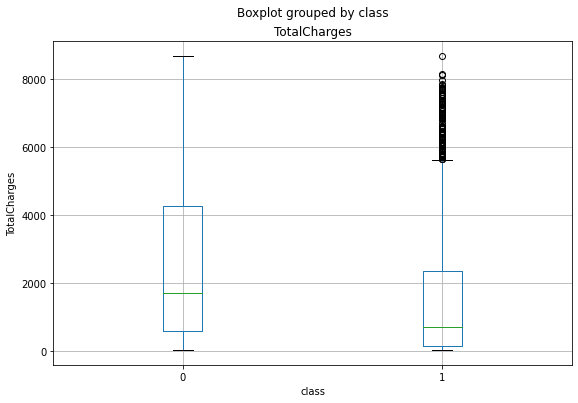

In [50]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
n_df.boxplot(column = 'TotalCharges', by = 'class', ax = ax)
ax.set_ylabel('TotalCharges')
plt.show

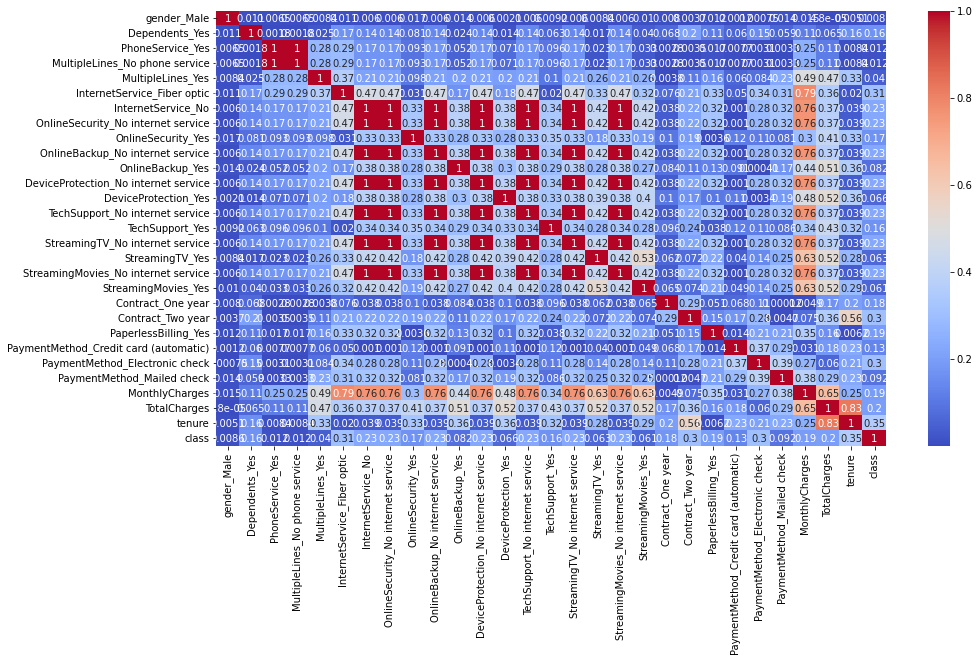

In [51]:
plt.figure(figsize = (15,8))
correlation = n_df.corr()
sns.heatmap(abs(correlation), annot = True, cmap = 'coolwarm')

In [53]:
n_df.replace([np.inf,-np.inf],np.nan).dropna(axis = 0,inplace = True)

In [54]:
n_df.dropna(inplace = True)

In [55]:
x  = n_df.iloc[:,:-1]
y = n_df['class'].copy()


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state = 0)
print(x_train.shape)
print(x_test.shape)

In [61]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept = True, max_iter = 10000)
clf.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [63]:
clf.coef_

array([[-3.31254292e-03, -2.08144124e-01, -5.37779326e-01,
         3.25332238e-01,  2.54088309e-01,  7.01526965e-01,
        -7.80900806e-02, -7.80900806e-02, -3.56979343e-01,
        -7.80900806e-02, -2.04904912e-01, -7.80900806e-02,
         1.82562241e-02, -7.80900806e-02, -4.81260142e-01,
        -7.80900806e-02,  3.05926748e-02, -7.80900806e-02,
         1.64254106e-01, -6.02702666e-01, -1.12372461e+00,
         3.53980888e-01, -2.32675863e-01,  3.41414220e-01,
        -7.76664636e-02,  5.61880765e-03,  3.27305406e-04,
        -6.22545530e-02]])

In [64]:
clf.intercept_

array([-0.21881774])

In [65]:
y_pred  = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [66]:
from sklearn import metrics
accur = metrics.accuracy_score(y_pred_train,y_train)
print(accur)

0.8033777777777777


In [69]:
accur1 = metrics.accuracy_score(y_pred, y_test)
print(accur1)

0.8081023454157783


In [71]:
train_preds = clf.predict_proba(x_train)
test_preds = clf.predict_proba(x_test)

In [72]:
test_preds

array([[0.71189251, 0.28810749],
       [0.87625867, 0.12374133],
       [0.81463677, 0.18536323],
       ...,
       [0.30493751, 0.69506249],
       [0.81086789, 0.18913211],
       [0.4441782 , 0.5558218 ]])

In [73]:
train_preds

array([[0.87833669, 0.12166331],
       [0.96456666, 0.03543334],
       [0.99779757, 0.00220243],
       ...,
       [0.76097014, 0.23902986],
       [0.81487675, 0.18512325],
       [0.8448889 , 0.1551111 ]])

In [78]:
metrics.confusion_matrix(y_pred,y_test)

array([[931, 163],
       [107, 206]])

In [77]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1094
           1       0.56      0.66      0.60       313

    accuracy                           0.81      1407
   macro avg       0.73      0.75      0.74      1407
weighted avg       0.82      0.81      0.81      1407

